<h1>Sumário<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Análise-de-dados-Python" data-toc-modified-id="Análise-de-dados-Python-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Análise de dados Python</a></span><ul class="toc-item"><li><span><a href="#Parte-2:--Análise-de-dados-de-um-movimento-bidimensional-uniformemente-acelerado" data-toc-modified-id="Parte-2:--Análise-de-dados-de-um-movimento-bidimensional-uniformemente-acelerado-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Parte 2:  Análise de dados de um movimento bidimensional uniformemente acelerado</a></span></li><li><span><a href="#Configuração" data-toc-modified-id="Configuração-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Configuração</a></span></li><li><span><a href="#Breve-recaptulação-da-teoria" data-toc-modified-id="Breve-recaptulação-da-teoria-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Breve recaptulação da teoria</a></span></li><li><span><a href="#Importar-dados" data-toc-modified-id="Importar-dados-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Importar dados</a></span></li></ul></li><li><span><a href="#Encontrando-as-componentes-da-aceleração" data-toc-modified-id="Encontrando-as-componentes-da-aceleração-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Encontrando as componentes da aceleração</a></span><ul class="toc-item"><li><span><a href="#Ajuste-da-função-para-trajetória-R" data-toc-modified-id="Ajuste-da-função-para-trajetória-R-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Ajuste da função para trajetória R</a></span><ul class="toc-item"><li><span><a href="#Coordenada-x" data-toc-modified-id="Coordenada-x-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Coordenada x</a></span></li><li><span><a href="#Coordenada-y" data-toc-modified-id="Coordenada-y-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>Coordenada y</a></span></li></ul></li></ul></li><li><span><a href="#Dados-experimento-aula-1-(Prof.-Dra.-Angela)." data-toc-modified-id="Dados-experimento-aula-1-(Prof.-Dra.-Angela).-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Dados experimento aula 1 (Prof. Dra. Angela).</a></span><ul class="toc-item"><li><span><a href="#Experimento:-Dado" data-toc-modified-id="Experimento:-Dado-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Experimento: Dado</a></span><ul class="toc-item"><li><span><a href="#Coordenada-z" data-toc-modified-id="Coordenada-z-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Coordenada z</a></span></li><li><span><a href="#Coordenada-x" data-toc-modified-id="Coordenada-x-3.1.2"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>Coordenada x</a></span></li></ul></li><li><span><a href="#Gráfico-Interativo" data-toc-modified-id="Gráfico-Interativo-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Gráfico Interativo</a></span></li></ul></li></ul></div>

# Análise de dados Python

## Parte 2:  Análise de dados de um movimento bidimensional uniformemente acelerado 

Nome:  ____

Ra: ___

## Configuração

Você precisará importar os seguintes pacotes.

In [378]:
# pacotes para manipulação dos dados

from numpy import *
import pandas as pd
%matplotlib inline

# pacote para confecção de gráficos para visualizar os resultados
# de uma maneira mais apreciável e criar nossos modelos
import matplotlib.pyplot as plt

# ajustando algumas configurações para melhor visualização dos gráficos
plt.rcParams['font.size'] = 16                           # altera o tamanho das fontes na figura
plt.rcParams['figure.figsize'] = 10, 8                    # altera o tamanho da figura
plt.rcParams['axes.axisbelow'] = True                    # para desenhar os grids atrás das curvas e pontos
for axis in ['xtick', 'ytick']:                          # loop para aplicar as mudanças nos eixos x e y
    plt.rcParams['{}.major.size'.format(axis)] = 10      # altera o tamanho dos ticks maiores
    plt.rcParams['{}.minor.size'.format(axis)] = 5       # altera o tamanho dos ticks menores
    plt.rcParams['{}.minor.visible'.format(axis)] = True # faz os ticks menores ficarem visíveis

Como antes, `numpy` é para python numérico,` pandas` é para importação de dados e `matplotlib` é para criação de gráficos.

Python é uma linguagem de programação orientada a objetos. Essa é uma maneira poderosa de programar, mas, para nossos propósitos, oferece uma maneira conveniente de armazenar dados. Cada "caminho" terá tempo $ t $, posição $ x $ e posição $ y $. A linha a seguir criará uma classe chamada `Path ', que será o modelo para nossos objetos Path.

## Breve recaptulação da teoria


O movimento bidimensional, usualmente é caracterizado por trajetórias descritas nos eixos x e y, assim podemos descrever esse movimento por meio de vetores. Nesse caso o vetor em coordenadas cartesianas $\vec{\,r}(x,y)$ será o nosso objeto de estudo, sendo as variáveis $x$ e $y$ dependentes do tempo, ou seja $y \rightarrow y(t)$ e $x \rightarrow x(t)$ .

$$
\vec{\,r}(x,y) = x(t)\, \hat{\!i} + y(t)\, \hat{\!j} \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \  (\hat{\!i} \text{vetor unitário})
$$

Nosso objetivo, é obter as funções $x(t)$ e $y(t)$ por meio do ajuste dos dados refrentes as trajetórias no plano $xy$.




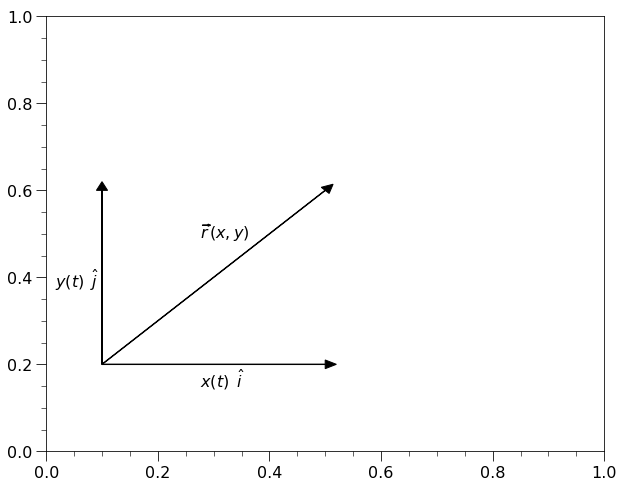

In [379]:
ax = plt.axes()
ax.arrow(0.1, 0.2, 0.4, 0.0, head_width=0.02, head_length=0.02, fc='k', ec='k')
ax.arrow(0.1, 0.2, 0.0, 0.4, head_width=0.02, head_length=0.02, fc='k', ec='k')
ax.arrow(0.1, 0.2, 0.4, 0.4, head_width=0.02, head_length=0.02, fc='k', ec='k')

ax.arrow(0.28, 0.52, 0.01, 0.0, head_width=0.005, head_length=0.005, fc='k', ec='k')

ax.annotate('$x(t)\ \   \hat{\!i}$',
            xy=(200, 100), xycoords='figure pixels')
ax.annotate('$ y(t)\ \ \hat{\!j}$',
            xy=(55, 200), xycoords='figure points')
ax.annotate("$ r \,(x,y)$",
            xy=(200, 250), xycoords='figure points')
plt.show()

Se você estiver curioso, pode aprender mais sobre [object oriented programming](https://searchmicroservices.techtarget.com/definition/object-oriented-programming-OOP) e [Python classes](https://docs.python.org/3/tutorial/classes.html).

##  Importar dados

Vamos importar um dado de uma trajetória bidimensional

Use o código a seguir para extrair as posições das coordenadas $ x $ e $ y $ do objeto no momento $ t $.

In [380]:
dataR = pd.read_csv('trajetoria_R.csv')
dataR.keys()    # mostrando o nome de cada coluna

Index(['Tempo (s)', 'X (m)', 'Y (m)'], dtype='object')

In [381]:
dataR

,Tempo (s),X (m),Y (m)
0,1.433333,0.371190,0.169096
1,1.466667,0.367586,0.166839
2,1.500000,0.363713,0.165254
3,1.533333,0.362293,0.162637
4,1.566667,0.360597,0.160735
5,1.600000,0.356972,0.158853
6,1.633333,0.355648,0.156616
7,1.666667,0.352028,0.154124
8,1.700000,0.349612,0.149842
9,1.733333,0.347455,0.147115


Precisamos dos dados $ x, y $ e $ t $ para cada caminho.

In [382]:
Rt = dataR['Tempo (s)'].values      # tempo em segundos
Rx = dataR['X (m)'].values * 1000  # x-posição, convertendo m em mm
Ry = dataR['Y (m)'].values * 1000  # y-posição, convertendo m em mm

Vamos dar uma olhada nos caminhos.

Text(0.5, 1.0, 'Trajetória R: Movimento nas coordenadas $x$ e $y$')

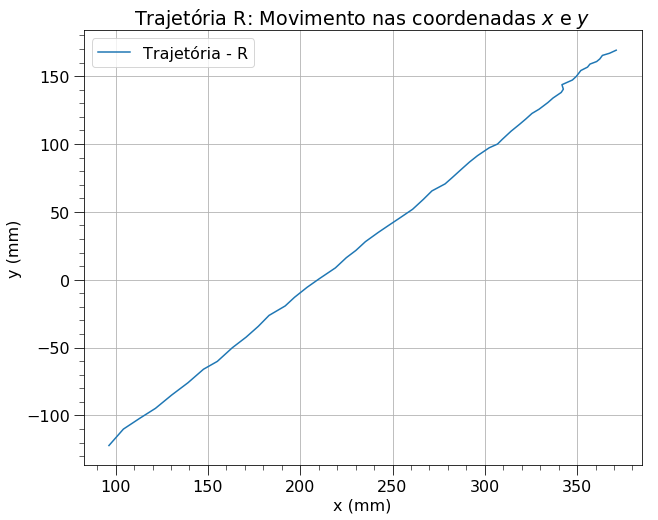

In [383]:
plt.plot(Rx, Ry, label='Trajetória - R') # gráfico da trajetória no plano xy
 
plt.grid()
plt.xlabel('x (mm)')
plt.ylabel('y (mm)')
plt.legend()
plt.title('Trajetória R: Movimento nas coordenadas $x$ e $y$' )

# Encontrando as componentes da aceleração

Precisamos encontrar as acelerações diferentes: $ a_x $ e $ a_y $ para o caminho R. 

$$ p (t) = A t^2 + B t + C $$.

Ajuste a parabola para o dado `x` versus `t` para a trajetória `R`:

## Ajuste da função para trajetória R

### Coordenada x

Ajuste dos dados para coordenada x 

In [384]:
(DD,EE,FF),cov = polyfit(Rt,Rx,2,cov=True) # Ajuste com a função polyfit grau 2 
dD,dE,dF = sqrt(diag(cov))    #  calculo da incerteza
RDx = 2*DD                # a aceleração é o dobro do coeficiente DD
RdDx = 2*dD                # incerteza da aceleração

" valor da aceleração com a incerteza, a = {} ± {} mm/s²".format(RDx,RdDx)
#" valor da velocidade inicial com a incerteza, v = {} '±' {} mm/s".format(EE,dE)
#" valor da posição inicial com a incerteza, c = {} '±' {} mm".format(FF,dF)

' valor da aceleração com a incerteza, a = -120.42091442149399 ± 1.368066490133296 mm/s²'

In [385]:
fitRt = linspace( Rt[0], Rt[-1], 100)    # vetor com 100 valores de tempo
fitRx = DD*fitRt**2 + EE*fitRt + FF      # valor da função de ajuste para esses valores de tempo

In [386]:
value_in_stringx="x(t) = {}t² + {}t - {}".format((DD.round(2)),(EE.round(2)),(FF.round(2))) # string_

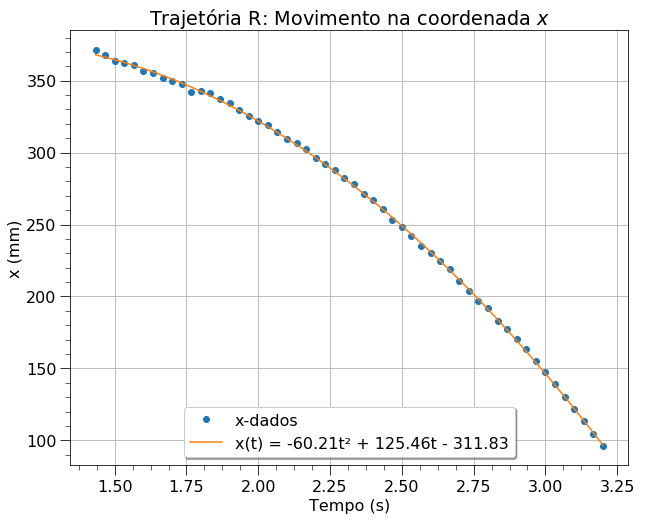

In [387]:
plt.grid()
plt.plot(Rt,Rx,'o',label='x-dados')      # gráficos dos dados com pontos ('o')
plt.plot(fitRt,fitRx,label=value_in_stringx)   # gráfico da função ajuste
plt.xlabel('Tempo (s)')
plt.ylabel('x (mm)')
plt.title('Trajetória R: Movimento na coordenada $x$')
plt.legend(loc='lower center',shadow=True)  # posição da legenda

### Coordenada y

In [388]:
(KK,JJ,VV),cov = polyfit(Rt,Ry,2,cov=True)
dK,dJ,dV = sqrt(diag(cov))    #  calculo da incerteza
RKy = 2*KK                 # a aceleração é o dobro do coeficiente KK
RdKy = 2*dK                # incerteza da aceleração

In [389]:
" valor da aceleração com a incerteza, a = {} ± {} mm/s²".format(RKy,RdKy)
#" valor da velocidade inicial com a incerteza, v = {} '±' {} mm/s".format(JJ,dJ)
#" valor da posição inicial com a incerteza, c = {} '±' {} mm".format(VV,dV)

' valor da aceleração com a incerteza, a = -124.10439195246654 ± 1.0480471789778396 mm/s²'

In [390]:
fitR2t = linspace( Rt[0], Rt[-1], 100)    # vetor com 100 valores de tempo
fitR2y = KK*fitR2t**2 + JJ*fitR2t + VV      # valor da função de ajuste para esses valores de tempo

In [391]:
value_in_stringy="y(t) = {}t² + {}t - {}".format((KK.round(2)),(JJ.round(2)),(VV.round(2)))
value_in_stringy # string para o label

'y(t) = -62.05t² + 124.15t - 118.45'

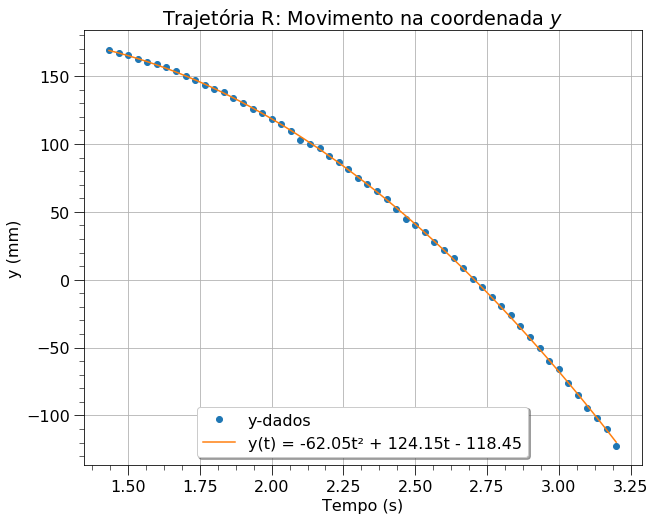

In [392]:
plt.grid()
plt.plot(Rt,Ry,'o',label='y-dados')      # gráficos dos dados com pontos ('o')
plt.plot(fitR2t,fitR2y,label=value_in_stringy)                   # gráfico da função ajuste
plt.xlabel('Tempo (s)')
plt.ylabel('y (mm)')
plt.title('Trajetória R: Movimento na coordenada $y$')
plt.legend(loc='lower center',shadow=True)

Depois de obter todos os quatro componentes. Relate seus resultados numéricos.

Agora traçaremos todos os dados.

Podemos ver todos os quatro gráficos de uma só vez usando "subtramas". O código a seguir faz quatro subparcelas em uma figura.

> Você pode aprender mais sobre `subplot` e outros recursos no `matplotlib` [tutorial](https://matplotlib.org/tutorials/index.html).

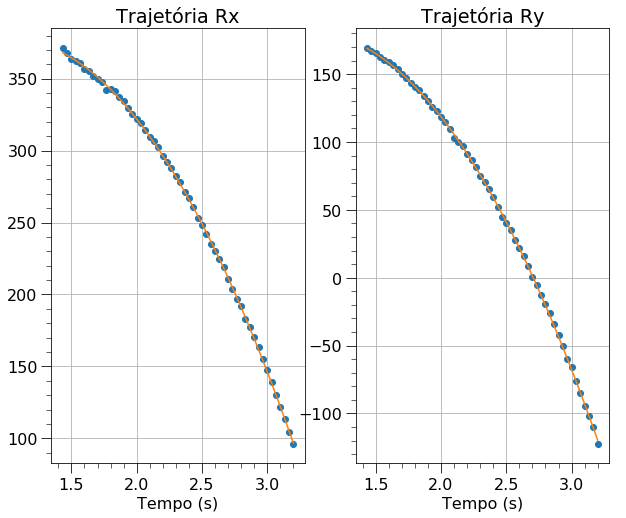

In [393]:
plt.subplot(121)      # quadro com dois gráficos
plt.plot(Rt,Rx,'o',label='x movimento')
plt.plot(fitRt,fitRx)                   
plt.title('Trajetória Rx')
plt.xlabel('Tempo (s)')
plt.grid()
plt.subplot(122)
plt.plot(Rt,Ry,'o',label='y movimento') 
plt.plot(fitRt,fitR2y)
plt.title('Trajetória Ry')
plt.xlabel('Tempo (s)')
plt.grid()

# Dados experimento aula 1 (Prof. Dra. Angela).

In [394]:
#Prof. Angela - Dados

# Leitura dos dados a partir de arquivo excel
import xlrd

wbang = xlrd.open_workbook('Dados_do_MRUV_Projetil.xlsx')
sh1ang = wbang.sheet_by_name(u'Planilha1')

#Dado1

t1dados = array(array(sh1ang.col_values(0)),dtype=float)  # leitura da primeira coluna (tempo)
x1dados = array(array(sh1ang.col_values(1)),dtype=float)  # leitura da segunda coluna (posição x)
z1dados = array(array(sh1ang.col_values(2)),dtype=float)  # leitura da terceira coluna (posição y)

## Experimento: Dado

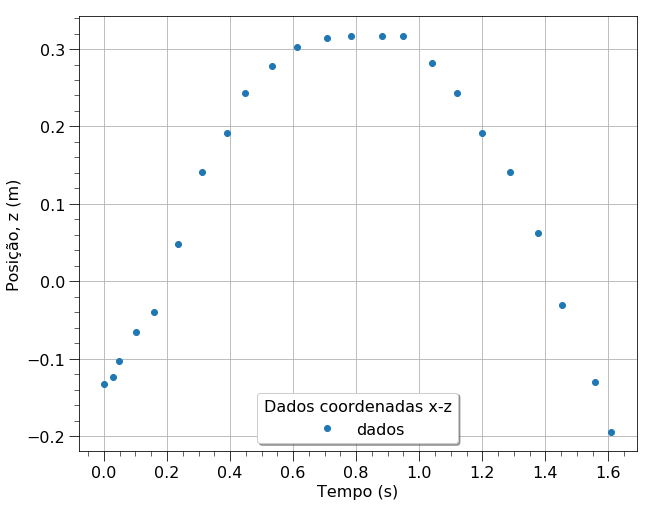

In [395]:
plt.grid()
plt.plot(x1dados, z1dados, 'o', label='dados')
plt.xlabel('Tempo (s)')
plt.ylabel('Posição, z (m)')
plt.legend(loc="lower center", ncol=2, shadow=True, title="Dados coordenadas x-z")

### Coordenada z

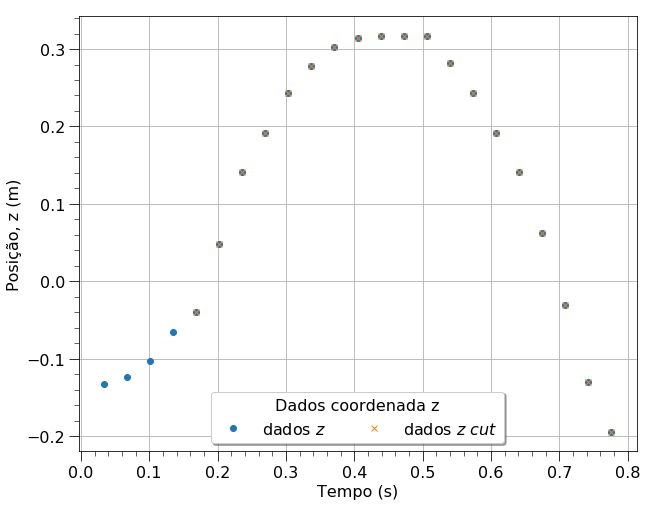

In [396]:
plt.grid()
w=4
z=23
plt.plot(t1dados, z1dados, 'o', label='dados $z$')
plt.plot(t1dados[w:z], z1dados[w:z], 'x', label='dados $z\  cut$')
plt.xlabel('Tempo (s)')
plt.ylabel('Posição, z (m)')
plt.legend(loc="lower center", ncol=2, shadow=True, title="Dados coordenada z")

In [397]:
A,B,C = polyfit(t1dados[w:z], z1dados[w:z],2)       # ajuste polinomial de grau 2 no dado t,y
print('Melhor ajuste com os coeficientes')
print('     A=',A,'B=',B,'C=',C)

Melhor ajuste com os coeficientes
     A= -4.813895517024911 B= 4.241668397445644 C= -0.607342633813243


In [398]:
aceleração_gravidade = (2*abs(A)).round(3) #valor da gravidade com precisão de 3 casas
"aceleração gravitacional é {} m/s²".format(aceleração_gravidade)

'aceleração gravitacional é 9.628 m/s²'

In [399]:
value_in_string = "Ajuste da parabola $y(t)= {}t² + {}t - {}$".format(A.round(2), B.round(2), abs(C).round(2))
value_in_string # definindo label com a função format

'Ajuste da parabola $y(t)= -4.81t² + 4.24t - 0.61$'

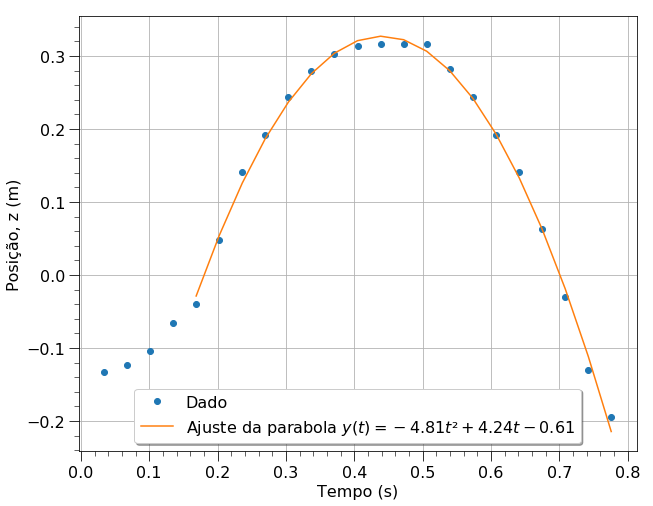

In [400]:
t_axisxy = t1dados[w:z]     #  t_axis é um vetor de mesmo comprimento do dado
plt.grid()
pp = A*t_axisxy**2 + B*t_axisxy + C       # avaliar o polinômio para todos os valores de t_axis
plt.plot(t1dados,z1dados,'o',label='Dado')    # gráfico dos dados
plt.plot(t_axisxy,pp,label=value_in_string)  # gráfico da parábola para todos os valores de t_axis
plt.xlabel('Tempo (s)')
plt.ylabel('Posição, z (m)')
plt.legend(loc='lower center',shadow=True)        # Mostra o gráfico com a legenda value_in_string
plt.savefig('graf_medida_g')

In [401]:
# Obtendo o valor de R2
yresidxy = z1dados[w:z] - pp # resíduo = valor real - valor ajustado (valor predito)
SQresid = sum(pow(yresidxy,2)) # soma dos quadrados dos resíduos 
SQtotal = len(z1dados[w:z]) * var(z1dados[w:z]) # número de elementos do vetor
R2 = 1 - SQresid/SQtotal # coeficiente de determinação
R2

0.9963054835025734

In [402]:
R2_texto="R² = {}".format(R2.round(5)) # definindo label com a função format 
R2_texto

'R² = 0.99631'

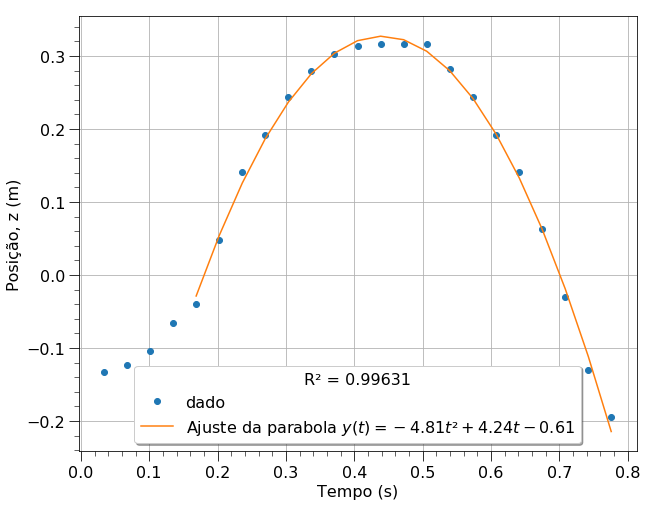

In [403]:
plt.grid()
plt.plot(t1dados,z1dados,'o',label='dado')    # # gráfico dos dados
plt.plot(t_axisxy,pp,label=value_in_string)  # gráfico da parábola para todos os valores de t_axis
plt.xlabel('Tempo (s)')
plt.ylabel('Posição, z (m)')
plt.legend(loc="lower center", ncol=1, shadow=True, title=R2_texto)

### Coordenada x

In [404]:
len(x1dados)

23

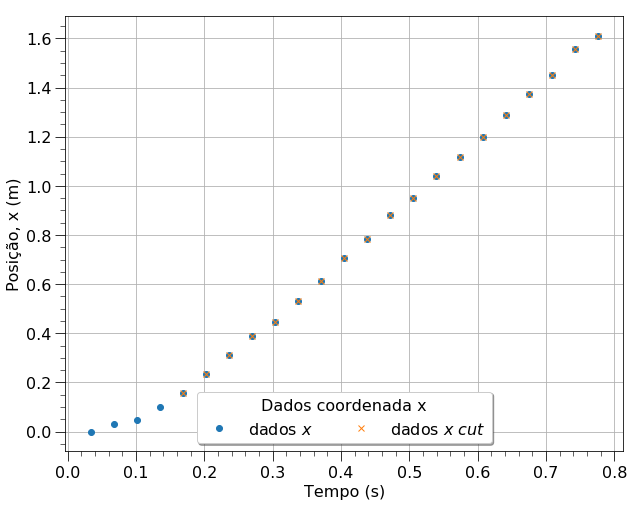

In [405]:
plt.grid()
plt.plot(t1dados, x1dados, 'o', label='dados $x $')
plt.plot(t1dados[w:z], x1dados[w:z], 'x', label='dados $x \ cut$')
plt.xlabel('Tempo (s)')
plt.ylabel('Posição, x (m)')
plt.legend(loc="lower center", ncol=2, shadow=True, title="Dados coordenada x")

_A parte inicial do gráfico se deve ao impulso gerado pelo lançamento do objeto_

In [406]:
G,H = polyfit(t1dados[w:z], x1dados[w:z],1)       # ajuste polinomial de grau 1 no dado t,y
print('best fit parabola has coefficients')
print('     G=',G,'H=',H)

best fit parabola has coefficients
     G= 2.430779778675744 H= -0.27221493379281514


In [407]:
vel_text = "x(t) = {}t - {}".format(G.round(2),abs(H).round(2))
vel_text

'x(t) = 2.43t - 0.27'

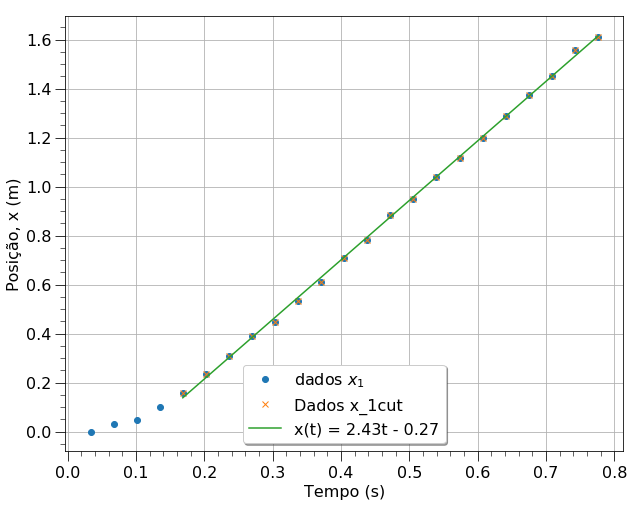

In [408]:
#t_vaxisx = linspace(t1dados[0],t1dados[-1],(f-i))     # t_axis é um vetor de mesmo comprimento do dado
plt.grid()
vt = G*t1dados[w:z] + H       # avalia a função linear em cada valor de t_vaxis
plt.plot(t1dados, x1dados, 'o', label='dados $x_1$')
plt.plot(t1dados[w:z],x1dados[w:z],'x', label='Dados x_1cut')
plt.plot(t1dados[w:z],vt,label=vel_text)  # gráfico da função horária da velocidade
plt.xlabel('Tempo (s)')
plt.ylabel('Posição, x (m)')
plt.legend(loc='lower center',shadow=True)        # posição da legenda

In [409]:
s_res = sum((x1dados[w:z] - vt)**2) # resíduo = (valor real - valor ajustado (valor predito))   
s_tot = sum((x1dados[w:z] - x1dados[w:z].mean())**2) # calcula a soma total
R2 = 1 - s_res/s_tot # retorna o coeficiente de determinação
R2

0.999318395032253

In [410]:
R2_texto="R² = {}".format(R2.round(5)) # definindo label com a função format 
R2_texto

'R² = 0.99932'

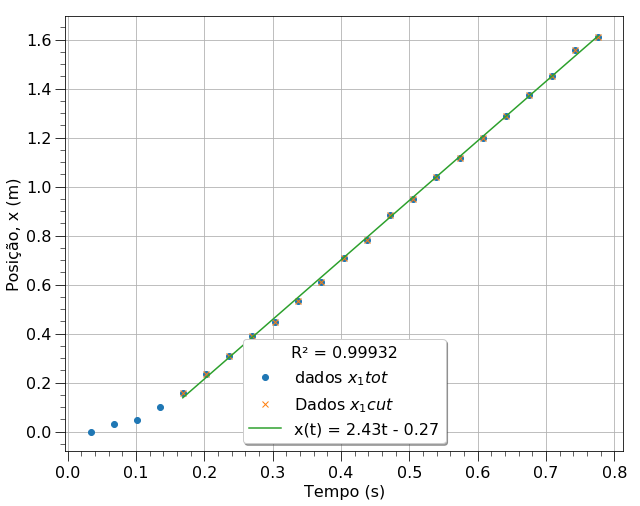

In [411]:
plt.grid()
vt = G*t1dados[w:z] + H       # avalia a função linear em cada valor de t_vaxis
plt.plot(t1dados, x1dados, 'o', label='dados $x_1tot$')
plt.plot(t1dados[w:z],x1dados[w:z],'x', label='Dados $x_1cut$')
plt.plot(t1dados[w:z],vt,label=vel_text)  # gráfico da função horária da velocidade
plt.xlabel('Tempo (s)')
plt.ylabel('Posição, x (m)')
plt.legend(loc='lower center',shadow=True, title=R2_texto)        # posição da legenda //right

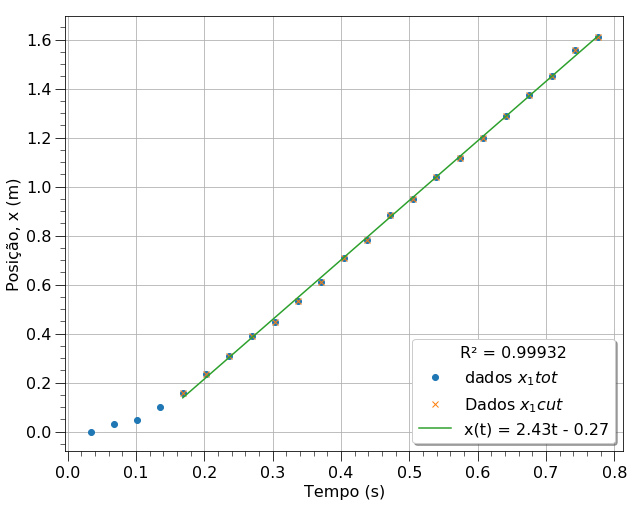

In [412]:
i=4
f=23
G,H = polyfit(t1dados[i:f], x1dados[i:f],1)
vel_text = "x(t) = {}t - {}".format(G.round(2),abs(H).round(2))
vt = G*t1dados[i:f] + H

# Obtendo o valor de R2   
s_res = sum((x1dados[i:f] - vt)**2) # resíduo = (valor real - valor ajustado (valor predito))   
s_tot = sum((x1dados[i:f] - x1dados[i:f].mean())**2) # calcula a soma total
R2 = 1 - s_res/s_tot # retorna o coeficiente de determinação

R2_texto="R² = {}".format(R2.round(5))

plt.grid()
vt = G*t1dados[i:f] + H       # avalia a função linear em cada valor de t_vaxis
plt.plot(t1dados, x1dados, 'o', label='dados $x_1tot$')
plt.plot(t1dados[i:f],x1dados[i:f],'x', label='Dados $x_1cut$')
plt.plot(t1dados[i:f],vt,label=vel_text)  # gráfico da função horária da velocidade
plt.xlabel('Tempo (s)')
plt.ylabel('Posição, x (m)')
plt.legend(loc='lower right',shadow=True, title=R2_texto)        # posição da legenda //right

## Gráfico Interativo

In [413]:
# pacotes gráfico interativo
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

#ref: https://ipywidgets.readthedocs.io/en/latest/examples/Using%20Interact.html
#ref: https://plotly.com/python/#controls

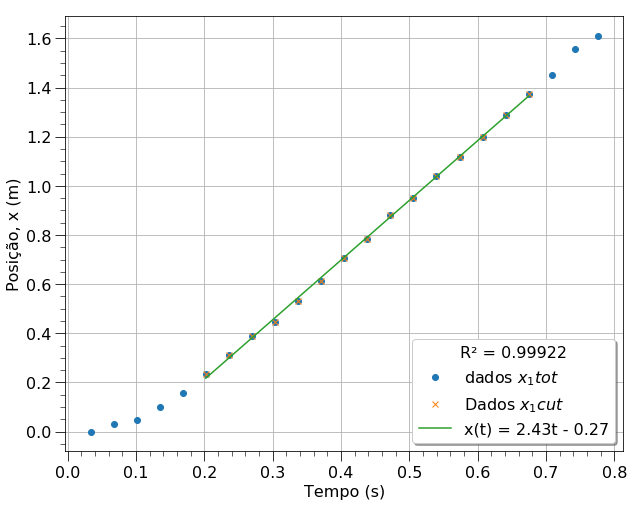

In [414]:
t1dados = array([0.03373, 0.06747, 0.1012 , 0.13493, 0.16867, 0.2024 , 0.23613,
       0.26987, 0.3036 , 0.33733, 0.37107, 0.4048 , 0.43853, 0.47227,
       0.506  , 0.53973, 0.57373, 0.6074 , 0.64144, 0.67474, 0.70867,
       0.74244, 0.77596])

x1dados= array([0.     , 0.0302 , 0.0477 , 0.10023, 0.15859, 0.23446, 0.31033,
       0.38912, 0.44748, 0.53211, 0.6109 , 0.70719, 0.78306, 0.88228,
       0.94939, 1.03985, 1.11864, 1.20035, 1.28789, 1.37544, 1.45131,
       1.55636, 1.60888])


def z(i,f):
    G,H = polyfit(t1dados[i:f], x1dados[i:f],1)
    vel_text = "x(t) = {}t - {}".format(G.round(2),abs(H).round(2))
    vt = G*t1dados[i:f] + H
    s_res = sum((x1dados[i:f] - vt)**2) # resíduo = (valor real - valor ajustado (valor predito))
    s_tot = sum((x1dados[i:f] - x1dados[i:f].mean())**2) # calcula a soma total
    R2 = 1 - s_res/s_tot # retorna o coeficiente de determinação
    R2_texto="R² = {}".format(R2.round(5))
    plt.grid()
    vt = G*t1dados[i:f] + H       # avalia a função linear em cada valor de t_vaxis
    plt.plot(t1dados, x1dados, 'o', label='dados $x_1tot$')
    plt.plot(t1dados[i:f],x1dados[i:f],'x', label='Dados $x_1cut$')
    plt.plot(t1dados[i:f],vt,label=vel_text)  # gráfico da função horária da velocidade
    plt.xlabel('Tempo (s)')
    plt.ylabel('Posição, x (m)')
    plt.legend(loc='lower right',shadow=True, title=R2_texto)        # posição da legenda //right
    plt.show()
    
interactive_plot = interactive(z, i=(0, 10, 1), f=(18, 23, 1))
output = interactive_plot.children[-1]
interactive_plot 